In [1]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
from keras.utils.np_utils import to_categorical

# 画像を1次元化
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
print(x_train)
print(x_test)

# 画素を0~1の範囲に変換(正規化)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# 正解ラベルをone-hot-encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [3]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=784))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.fit(x_train, y_train,
            batch_size=100,
            epochs=12,
            verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/12
60000/60000 [==============================] - 1s 24us/step - loss: 0.3711 - acc: 0.8983
Epoch 2/12
60000/60000 [==============================] - 1s 18us/step - loss: 0.1925 - acc: 0.9442: 0s - loss: 0.2091 
Epoch 3/12
60000/60000 [==============================] - 1s 17us/step - loss: 0.1437 - acc: 0.9584
Epoch 4/12
60000/60000 [==============================] - 1s 17us/step - loss: 0.1161 - acc: 0.9664: 0s - loss: 0.1178 - acc: 0
Epoch 5/12
60000/60000 [==============================] - 1s 17us/step - loss: 0.0979 - acc: 0.9712
Epoch 6/12
60000/60000 [==============================] - 1s 17us/step - loss: 0.0851 - acc: 0.9756
Epoch 7/12
60000/60000 [==============================] - 1s 18us/step - loss: 0.0754 - acc: 0.9782
Epoch 8/12
60000/60000 [==============================] - 1s 17us/step - loss: 0.0677 - acc: 0.9802
Epoch 9/12
60000/60000 [==============================] - 1s 18us/step - loss: 0.0608 - acc: 0.9824: 0s 

In [5]:
score = model.evaluate(x_test, y_test)
print(score[0])
print(score[1])

10000/10000 [==============================] - 0s 44us/step
0.08721808785174508
0.9746


In [12]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [14]:
from keras.utils.np_utils import to_categorical

# 画像を1次元化
x_train = x_train.reshape(50000,3, 32, 32)
x_test = x_test.reshape(10000,3, 32, 32)

# 画素を0~1の範囲に変換(正規化)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# 正解ラベルをone-hot-encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

[[[[9.0734335e-04 9.5347944e-04 9.6885813e-04 ... 1.4302192e-03
    2.0146100e-03 1.5840061e-03]
   [1.1841600e-03 1.9223376e-03 1.5224913e-03 ... 1.7224145e-03
    1.1534026e-03 2.0453674e-03]
   [1.6147635e-03 1.0611304e-03 2.0915035e-03 ... 2.2760478e-03
    1.9069589e-03 1.5840061e-03]
   ...
   [8.3044986e-04 5.0749717e-04 1.3225683e-03 ... 2.0453674e-03
    1.4148405e-03 8.4582856e-04]
   [2.3683200e-03 1.8762015e-03 1.4455979e-03 ... 1.0457517e-03
    1.2302961e-03 6.1514805e-04]
   [1.9992310e-04 1.4917339e-03 8.1507111e-04 ... 1.4148405e-03
    1.1687813e-03 2.6912726e-03]]

  [[1.9838526e-03 1.6301422e-03 2.1837757e-03 ... 2.0607461e-03
    1.4302192e-03 8.7658595e-04]
   [2.2299117e-03 1.7531719e-03 1.3687044e-03 ... 8.4582856e-04
    1.7070358e-03 9.2272204e-04]
   [2.1530181e-04 2.2452904e-03 1.3225683e-03 ... 2.3068052e-03
    1.7377932e-03 3.2141483e-03]
   ...
   [1.4148405e-03 2.3529413e-03 1.5993848e-03 ... 1.7377932e-03
    1.0303730e-03 2.6605153e-03]
   [2.3068052e

In [7]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation,Dropout
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from time import time

train_urls = "/Users/e175751/Downloads/titanic/train.csv"
test_urls = "/Users/e175751/Downloads/titanic/test.csv"

np.random.seed(42)
train = pd.read_csv(train_urls)
test = pd.read_csv(test_urls)

In [9]:
def kesson_table(df): 
        null_val = df.isnull().sum()
        percent = 100 * df.isnull().sum()/len(df)
        kesson_table = pd.concat([null_val, percent], axis=1)
        kesson_table_ren_columns = kesson_table.rename(
        columns = {0 : '欠損数', 1 : '%'})
        return kesson_table_ren_columns

In [10]:
kesson_table(train)
kesson_table(test)

,欠損数,%
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,86,20.574163
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.239234
Cabin,327,78.229665


In [11]:
train["Age"] = train["Age"].fillna(train["Age"].median())
# Mapping Age
train["Age"][train["Age"] <= 16 ] = 0
train["Age"][(train["Age"] > 16) & (train["Age"] <= 32) ] = 1
train["Age"][(train["Age"] > 32) & (train["Age"] <= 48) ] = 2
train["Age"][(train["Age"] > 48) & (train["Age"] <= 64) ] = 3
train["Age"][ train["Age"] > 64 ] = 4
train["Age"] = train['Age'].astype(int)
    
train["Embarked"] = train["Embarked"].fillna("S")

train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1
train["Embarked"][train["Embarked"] == "S" ] = 0
train["Embarked"][train["Embarked"] == "C" ] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

kesson_table(train)

/Users/e175751/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/e175751/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/e175751/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [12]:
#train=train.drop(columns=["Cabin"],axis=1)
kesson_table(train)

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [13]:
for data in df_all:
    print(f"\n -------- {data.index } ------- \n")
    print(data.isnull().sum())

NameError: name 'df_all' is not defined

In [ ]:
test = pd.get_dummies(test,columns=['Sex','Embarked'])
train = pd.get_dummies(train,columns=['Sex','Embarked'])

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 83.6+ KB


In [15]:
y=train['Survived']
X=train.drop(columns=['Survived'],axis=1)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0
5,6,0,3,"Moran, Mr. James",0,1,0,0,330877,8.4583,NaN,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,3,0,0,17463,51.8625,E46,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0,3,1,349909,21.0750,NaN,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,1,0,2,347742,11.1333,NaN,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0,1,0,237736,30.0708,NaN,1


In [16]:
#Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [17]:
model = Sequential()

batch_size = 32
epochs = 20

model.add(Dense(32, activation="relu", input_dim=9))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                320       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer="adam", 
                          loss="binary_crossentropy", 
                          metrics=["accuracy"])

In [20]:
model.fit(X_train, 
                  y_train, 
                  epochs=epochs, 
                  batch_size=batch_size
                  )

ValueError: Error when checking input: expected dense_1_input to have shape (9,) but got array with shape (11,)

In [21]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

ValueError: Error when checking input: expected dense_1_input to have shape (9,) but got array with shape (11,)

In [22]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation,Dropout
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from time import time
import re

train_urls = "/Users/e175751/Downloads/titanic/train.csv"
test_urls = "/Users/e175751/Downloads/titanic/test.csv"

np.random.seed(42)
train = pd.read_csv(train_urls)
test = pd.read_csv(test_urls)

In [23]:
kesson_table(train)

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [26]:
full_data = [train, test]

# Some features of my own that I have added in
# Gives the length of the name
train['Name_length'] = train['Name'].apply(len)
test['Name_length'] = test['Name'].apply(len)
# Feature that tells whether a passenger had a cabin on the Titanic
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

# Feature engineering steps taken from Sina
# Create new feature FamilySize as a combination of SibSp and Parch
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
# Create new feature IsAlone from FamilySize
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
# Remove all NULLS in the Embarked column
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
# Remove all NULLS in the Fare column and create a new feature CategoricalFare
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
# Create a New feature CategoricalAge
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
train['CategoricalAge'] = pd.cut(train['Age'], 5)
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 
    

ValueError: Bin edges must be unique: array([0. , 0.5, 2. , 2. , 3. ]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [27]:
# Feature selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = train.drop(drop_elements, axis = 1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)
test  = test.drop(drop_elements, axis = 1)

In [28]:
train

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Name_length,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,1,0,0,0,23,0,2,0,1
1,1,1,0,2,0,3,1,51,1,2,0,3
2,1,3,0,1,0,1,0,22,0,1,1,2
3,1,1,0,2,0,3,0,44,1,2,0,3
4,0,3,1,2,0,1,0,24,0,1,1,1
5,0,3,1,1,0,1,2,16,0,1,1,1
6,0,1,1,3,0,3,0,23,1,1,1,1
7,0,3,1,0,1,2,0,30,0,5,0,4
8,1,3,0,1,2,1,0,49,0,3,0,3
9,1,2,0,0,0,2,1,35,0,2,0,3


In [29]:
y=train['Survived']
X=train.drop(columns=['Survived'],axis=1)

In [30]:
X

,Pclass,Sex,Age,Parch,Fare,Embarked,Name_length,Has_Cabin,FamilySize,IsAlone,Title
0,3,1,1,0,0,0,23,0,2,0,1
1,1,0,2,0,3,1,51,1,2,0,3
2,3,0,1,0,1,0,22,0,1,1,2
3,1,0,2,0,3,0,44,1,2,0,3
4,3,1,2,0,1,0,24,0,1,1,1
5,3,1,1,0,1,2,16,0,1,1,1
6,1,1,3,0,3,0,23,1,1,1,1
7,3,1,0,1,2,0,30,0,5,0,4
8,3,0,1,2,1,0,49,0,3,0,3
9,2,0,0,0,2,1,35,0,2,0,3


In [31]:
#Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

model = Sequential()

batch_size = 32
epochs = 20

model.add(Dense(64, activation="relu", input_dim=11))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer="adam", 
                          loss="binary_crossentropy", 
                          metrics=["accuracy"])

In [34]:
model.fit(X_train, 
                  y_train, 
                  epochs=epochs, 
                  batch_size=batch_size
                  )

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
623/623 [==============================] - 1s 1ms/step - loss: 0.7788 - acc: 0.5875
Epoch 2/20
623/623 [==============================] - 0s 67us/step - loss: 0.6378 - acc: 0.6324
Epoch 3/20
623/623 [==============================] - 0s 81us/step - loss: 0.6333 - acc: 0.6629
Epoch 4/20
623/623 [==============================] - 0s 68us/step - loss: 0.5885 - acc: 0.6838
Epoch 5/20
623/623 [==============================] - 0s 68us/step - loss: 0.5790 - acc: 0.7047
Epoch 6/20
623/623 [==============================] - 0s 69us/step - loss: 0.5456 - acc: 0.7448
Epoch 7/20
623/623 [==============================] - 0s 86us/step - loss: 0.5245 - acc: 0.7287
Epoch 8/20
623/623 [==============================] - 0s 72us/step - loss: 0.5276 - acc: 0.7480
Epoch 9/20
623/623 [==============================] - 0s 72us/step - loss: 0.5034 - acc: 0.7705
Epoch 10/20
623/623 [==============================] - 0s 69us/step - loss: 0.5043 - acc:

In [35]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4476593319159835
Test accuracy: 0.8059701492537313


In [36]:
test

,Pclass,Sex,Age,Parch,Fare,Embarked,Name_length,Has_Cabin,FamilySize,IsAlone,Title
0,3,1,2,0,0,2,16,0,1,1,1
1,3,0,2,0,0,0,32,0,2,0,3
2,2,1,3,0,1,2,25,0,1,1,1
3,3,1,1,0,1,0,16,0,1,1,1
4,3,0,1,1,1,0,44,0,3,0,3
5,3,1,0,0,1,0,26,0,1,1,1
6,3,0,1,0,0,2,20,0,1,1,2
7,2,1,1,1,2,0,28,0,3,0,1
8,3,0,1,0,0,1,41,0,1,1,3
9,3,1,1,0,2,0,23,0,3,0,1


In [37]:
expect = model.predict( test, batch_size = 32 )

In [38]:
import pandas as pd
import numpy as np

In [39]:
test_urls = "/Users/e175751/Downloads/titanic/test.csv"
test_df = pd.read_csv(test_urls)

In [40]:
PassengerId = np.array(test_df["PassengerId"]).astype(int)

In [41]:
# my_prediction(予測データ）とPassengerIdをデータフレームへ落とし込む
my_solution = pd.DataFrame(expect, PassengerId, columns = ["Survived"])
 
# my_tree_one.csvとして書き出し
my_solution.to_csv("my_tree_one.csv", index_label = ["PassengerId"])

In [42]:
df = pd.read_csv("my_tree_one.csv")

In [43]:
list=[]
num=0
for i in df["Survived"]:
    if(i > 0.5):
        num=1
        list.append(num)
    else:
        num=0
        list.append(num)
        
expect = list

In [219]:
# my_prediction(予測データ）とPassengerIdをデータフレームへ落とし込む
my_solution = pd.DataFrame(expect, PassengerId, columns = ["Survived"])
 
# my_tree_one.csvとして書き出し
my_solution.to_csv("my_tree_one.csv", index_label = ["PassengerId"])

In [4]:
from keras.datasets import mnist

In [6]:
from keras.datasets import mnist 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = {'png', 'retina'}

In [7]:
import os
from keras.models import Sequential, load_model
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense, Dropout
from keras.optimizers import Adam, Adagrad, RMSprop, SGD
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.datasets import cifar10

In [8]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape) 

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [9]:
# データ型の変換＆正規化
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# one-hot変換
num_classes = 10 
y_train = to_categorical(y_train, num_classes = num_classes)
y_test = to_categorical(y_test, num_classes = num_classes)

In [10]:
model = Sequential()

model.add(Conv2D(
    32, # フィルター数（出力される特徴マップのチャネル）
    kernel_size = 3, # フィルターサイズ
    padding = "same", # 入出力サイズが同じ
    activation = "relu", # 活性化関数
    input_shape = (32, 32, 3) # 入力サイズ
))
model.add(Conv2D(
    32,
    kernel_size = 3,
    activation = "relu"
))
# 各特徴マップのチャネルは変わらず、サイズが1/2
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(
    64,
    kernel_size = 3,
    padding = "same", 
    activation = "relu"
))
model.add(Conv2D(
    64,
    kernel_size = 3,
    activation = "relu"
))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# 全結合層（fully-connected layers）につなげるため、
# マトリックスデータ（多次元配列）である特徴マップを多次元ベクトルに変換（平坦化）
model.add(Flatten())
# サイズ512のベクトル（512次元ベクトル）を出力
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
# クラス数のベクトルを出力
model.add(Dense(num_classes))
model.add(Activation("softmax"))

optimizer = Adam(lr = 0.001)
model.compile(
    optimizer = optimizer,
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [12]:
# EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1
)

# ModelCheckpoint
weights_dir = './weights/'
if os.path.exists(weights_dir) == False:os.mkdir(weights_dir)
model_checkpoint = ModelCheckpoint(
    weights_dir + "val_loss{val_loss:.3f}.hdf5",
    monitor = 'val_loss',
    verbose = 1,
    save_best_only = True,
    save_weights_only = True,
    period = 3
)

# reduce learning rate
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.1,
    patience = 3,
    verbose = 1
)

# log for TensorBoard
logging = TensorBoard(log_dir = "log/")

In [13]:
%%time

# モデルの学習
hist = model.fit(
    X_train,
    y_train,
    verbose = 1,
    epochs = 50,
    batch_size = 32,
    validation_split = 0.2,
    callbacks = [early_stopping, reduce_lr, logging]
)


Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 196s 5ms/step - loss: 1.5473 - acc: 0.4336 - val_loss: 1.2103 - val_acc: 0.5736
Epoch 2/50
40000/40000 [==============================] - 201s 5ms/step - loss: 1.1436 - acc: 0.5932 - val_loss: 0.9797 - val_acc: 0.6505
Epoch 3/50
40000/40000 [==============================] - 189s 5ms/step - loss: 0.9879 - acc: 0.6522 - val_loss: 0.8824 - val_acc: 0.6926
Epoch 4/50
40000/40000 [==============================] - 176s 4ms/step - loss: 0.8760 - acc: 0.6938 - val_loss: 0.7880 - val_acc: 0.7228
Epoch 5/50
40000/40000 [==============================] - 197s 5ms/step - loss: 0.8003 - acc: 0.7203 - val_loss: 0.7574 - val_acc: 0.7358
Epoch 6/50
40000/40000 [==============================] - 175s 4ms/step - loss: 0.7462 - acc: 0.7395 - val_loss: 0.7317 - val_acc: 0.7496
Epoch 7/50
 2784/40000 [=>............................] - ETA: 3:06 - loss: 0.6936 - acc: 0.7568

KeyboardInterrupt: 

In [14]:
model_dir = './model/'
if os.path.exists(model_dir) == False:os.mkdir(model_dir)

model.save(model_dir + 'model.hdf5')

# optimizerのない軽量モデルを保存（学習や評価は不可だが、予測は可能）
model.save(model_dir + 'model-opt.hdf5', include_optimizer = False)

# ベストの重みのみ保存
model.save_weights(weights_dir + 'model_weight.hdf5')

NameError: name 'hist' is not defined

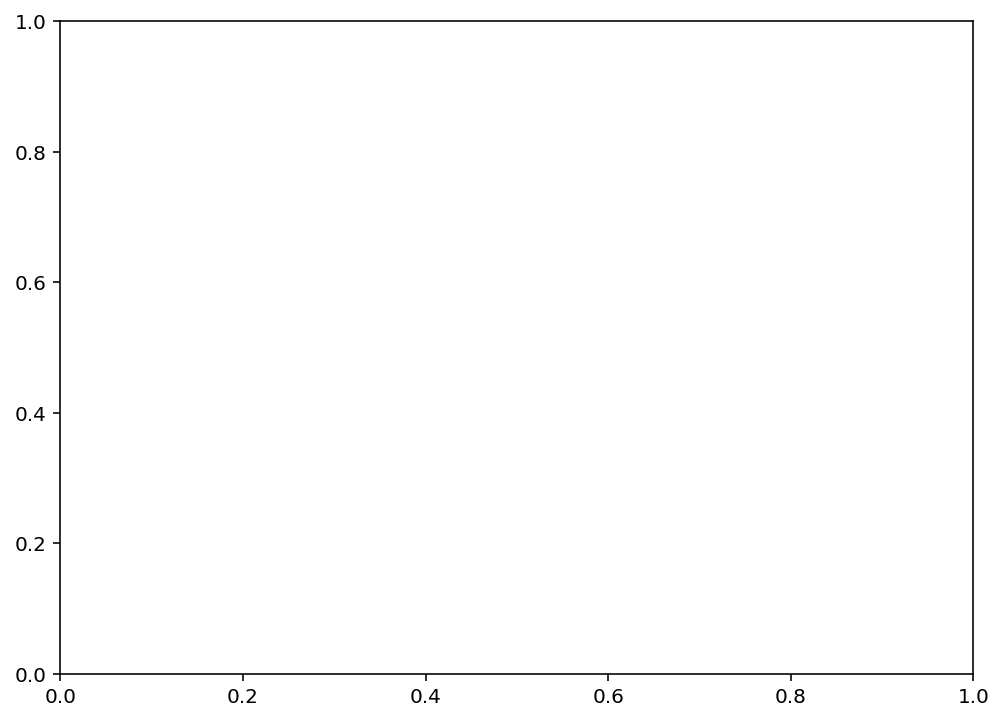

In [15]:
plt.figure(figsize = (18,6))

# accuracy
plt.subplot(1, 2, 1)
plt.plot(hist.history["acc"], label = "acc", marker = "o")
plt.plot(hist.history["val_acc"], label = "val_acc", marker = "o")
#plt.xticks(np.arange())
#plt.yticks(np.arange())
plt.xlabel("epoch")
plt.ylabel("accuracy")
#plt.title("")
plt.legend(loc = "best")
plt.grid(color = 'gray', alpha = 0.2)

# loss
plt.subplot(1, 2, 2)
plt.plot(hist.history["loss"], label = "loss", marker = "o")
plt.plot(hist.history["val_loss"], label = "val_loss", marker = "o")
#plt.xticks(np.arange())
#plt.yticks(np.arange())
plt.xlabel("epoch")
plt.ylabel("loss")
#plt.title("")
plt.legend(loc = "best")
plt.grid(color = 'gray', alpha = 0.2)

plt.show()


In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print("evaluate loss: {0[0]}".format(score))
print("evaluate acc: {0[1]}".format(score))